In [1]:
import pandas as pd

In [2]:
photos = pd.read_hdf('google_photo_data.hdf')

## Orientation of the image

If width is more than height, it's landscape else portrait. If they're equal, it's a square!

In [3]:
def orientation(row):
    if row['width'] > row['height']:
        return "Landscape"
    elif row['height'] > row['width']:
        return "Portrait"
    return "Square"
photos['orientation'] = photos.apply(orientation, axis=1)

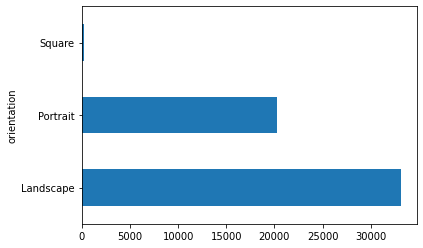

In [4]:
photos.groupby('orientation').id.count().plot(kind='barh')

## Change in style over the years.

For this, i'll first calculate a percentage of portrait over the total photos per year (which are not square).

In [5]:
yearly_orientation = photos.groupby([photos.creationTime.dt.year, photos.orientation]).id.count().unstack(level=1)

There are some NaNs in the dataframe, let's fix that.

In [6]:
yearly_orientation.fillna(0, inplace=True)

Now, calculating the percentage.

In [7]:
yearly_orientation['Percentage'] = yearly_orientation.Portrait/(yearly_orientation.Landscape+yearly_orientation.Portrait)

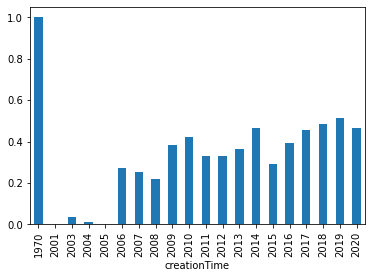

In [8]:
yearly_orientation.Percentage.plot(kind='bar')

1970 is an outlier. But yea, I've been taking more and more of my images in portrait mode!

## Most preferred focal length

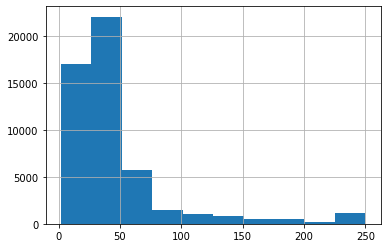

In [9]:
photos.focalLength.hist()

I have a 50mm prime lens which is my main work horse. Also, most of the other low focal length images are probably coming from my phone rather than my DSLR. This plot makes sense to me. But it's interesting for me that I take a lot of image in full zoom rather than half zoomed with my 55-250mm lens

## Camera Make

I owned mostly Canon cameras. The next major contributors are phones. I also realize that I uploaded a lot of images from others into my Google Photos.

In [10]:
photos.cameraMake.value_counts()

Canon                    45077
Xiaomi                    2108
NIKON CORPORATION         1393
Motorola                  1077
HTC                        679
NIKON                      181
SJCAM                       87
Nokia                       39
Panasonic                   19
Samsung Techwin             12
HP                           8
RICOH                        7
samsung                      6
SONY                         5
OnePlus                      5
Sony                         4
Layout from Instagram        4
Noritsu Koki                 3
SONY                         1
NORITSU KOKI                 1
Name: cameraMake, dtype: int64

## Canon Camera Models

I'm curious to know if all the Canon images came from my camera or there are from other's camera.

In [11]:
photos[photos.cameraMake == 'Canon'].cameraModel.value_counts()

Canon EOS 550D             33810
Canon PowerShot S5 IS      10852
Canon EOS 500D               252
Canon PowerShot A530         123
Canon EOS REBEL T4i           18
Canon EOS 600D                 9
Canon PowerShot A720 IS        4
Canon EOS 350D DIGITAL         4
Canon EOS 400D DIGITAL         3
Canon EOS 20D                  1
Canon EOS 5D Mark II           1
Name: cameraModel, dtype: int64

Seems like the top two are mine, but the rest, I don't know!

## Camera model timeline

In [12]:
mycamerapics = photos[photos.cameraModel.str.contains('550D|PowerShot S5', na=False)]

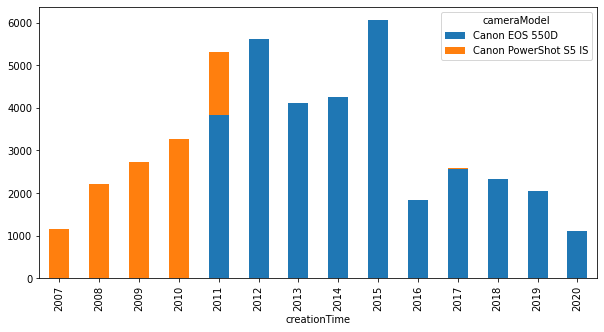

In [13]:
mycamerapics.groupby([
        mycamerapics.cameraModel, 
        mycamerapics.creationTime.dt.year
    ]).id.count().unstack(level=0).plot(kind='bar', stacked=True, figsize=(10,5))

I changed my camera in 2011!

## Focal length vs Aperture

Let me check the distribution of focal length and aperture from both of my cameras.

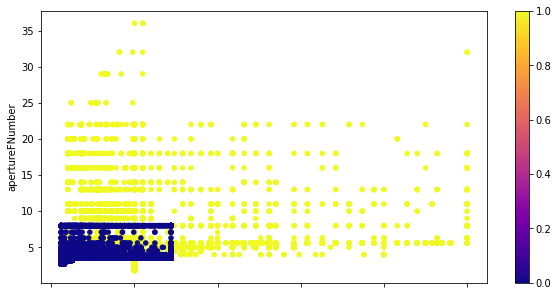

In [14]:
mycamerapics.plot.scatter(
    x='focalLength', y='apertureFNumber', c=mycamerapics.cameraModel.str.contains('550D'),
    colormap='plasma', figsize=(10,5)
)

The dots in yellow are ones from my DSLR and blue are from 'Powershot'. 
Interesting that the 'PowerShot' had a small focal length and lower range of fstops. (I dont know why the x-axis annotations disappeared!)